In [5]:
ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/DLCVNLP Aug 28th Batch/ALL_NOTES/Class 05 September 11"

In [6]:
import os

os.chdir(ROOT)

In [7]:
assert ROOT == os.getcwd()

In [8]:
os.getcwd()

'/content/drive/My Drive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/DLCVNLP Aug 28th Batch/ALL_NOTES/Class 05 September 11'

In [9]:
with open("test.txt", "w") as f:
  f.writelines("hello colab")

## Implimentation of Perceptron


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib # FOR SAVING MY MODEL AS A BINARY FILE
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight") # THIS IS STYLE OF GRAPHS

In [11]:
np.random.randn(3) * 1e-4

array([ 9.63417789e-05, -2.00232508e-05, -1.98861771e-05])

In [13]:
-np.ones((4, 1))

array([[-1.],
       [-1.],
       [-1.],
       [-1.]])

In [26]:
1e-4

0.0001

In [69]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4 # SMALL WEIGHT INIT
    print(f"initial weights before training: \n{self.weights}")
    self.eta = eta # LEARNING RATE
    self.epochs = epochs 


  def activationFunction(self, inputs, weights):
    z = np.dot(inputs, weights) # z = W * X
    return np.where(z > 0, 1, 0) # CONDITION, IF TRUE, ELSE

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # CONCATINATION
    print(f"X with bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print("--"*10)
      print(f"for epoch: {epoch}")
      print("--"*10)

      y_hat = self.activationFunction(X_with_bias, self.weights) # foward propagation
      print(f"predicted value after forward pass: \n{y_hat}")
      self.error = self.y - y_hat
      print(f"error: \n{self.error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error) # backward propagation
      print(f"updated weights after epoch:\n{epoch}/{self.epochs} : \n{self.weights}")
      print("#####"*10)


  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(X), 1))]
    return self.activationFunction(X_with_bias, self.weights)

  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f"total loss: {total_loss}")
    return total_loss


In [70]:
def prepare_data(df):
  X = df.drop("y", axis=1)

  y = df["y"]

  return X, y

In [71]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1],
}

df = pd.DataFrame(AND)

df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [72]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model = Perceptron(eta=ETA, epochs=EPOCHS)
model.fit(X, y)

_ = model.total_loss()


initial weights before training: 
[0.0001 0.0001 0.0001]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[0.0001 0.0001 0.0001]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[0.0001 0.0001 0.0001]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[0.0001 0.0001 0.0001]
##################################################
--------------------
for epoch: 3
--------------------


In [34]:
model.predict(X)

array([0, 0, 0, 1])

In [35]:
X.values

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [37]:
inputs = np.array([[1,1], [0,1]])
model.predict(inputs)

array([1, 0])

In [38]:
def save_model(model, filename):
  model_dir = "models"
  os.makedirs(model_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  filePath = os.path.join(model_dir, filename) # model/filename
  joblib.dump(model, filePath)

In [39]:
save_model(model, "and.model")

In [41]:
loaded_model = joblib.load("models/and.model")
loaded_model.predict(inputs)

array([1, 0])

In [42]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1],
}

df = pd.DataFrame(OR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [43]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_OR = Perceptron(eta=ETA, epochs=EPOCHS)
model_OR.fit(X, y)

_ = model_OR.total_loss()


initial weights before training: 
[5.10343161e-05 2.50471312e-05 5.12690791e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 1]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.30005103  0.30002505 -0.59994873]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[ 0.30005103  0.30002505 -0.29994873]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[3.00051034e-01 3.00025047e-01 5.12690791e-05]
############################

In [44]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0],
}

df = pd.DataFrame(XOR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [47]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_XOR = Perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()


initial weights before training: 
[ 5.15145310e-05 -7.69228712e-05 -1.52399131e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[-0.29994849 -0.30007692  0.5998476 ]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[ 5.15145310e-05 -7.69228712e-05 -1.52399131e-04]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[-0.29994849 -0.30007692  0.5998476 ]
######################

In [48]:
def save_plot(df, file_name, model):
  def _create_base_plot(df):
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="winter")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
    figure = plt.gcf() # get current figure
    figure.set_size_inches(10, 8)

  def _plot_decision_regions(X, y, classfier, resolution=0.02):
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    X = X.values # as a array
    x1 = X[:, 0] 
    x2 = X[:, 1]
    x1_min, x1_max = x1.min() -1 , x1.max() + 1
    x2_min, x2_max = x2.min() -1 , x2.max() + 1  

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    print(xx1)
    print(xx1.ravel())
    Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.plot()



X, y = prepare_data(df)

_create_base_plot(df)
_plot_decision_regions(X, y, model)

plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
plotPath = os.path.join(plot_dir, file_name) # model/filename
plt.savefig(plotPath)

In [49]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1],
}

df = pd.DataFrame(OR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [53]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_OR = Perceptron(eta=ETA, epochs=EPOCHS)
model_OR.fit(X, y)

_ = model_OR.total_loss()


initial weights before training: 
[-2.01756236e-04 -3.16342667e-05 -1.31427858e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[1 1 0 0]
error: 
0   -1
1    0
2    1
3    1
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.59979824  0.29996837 -0.30013143]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[ 5.99798244e-01  2.99968366e-01 -1.31427858e-04]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[0.59979824 0.29996837 0.29986857]
#########################

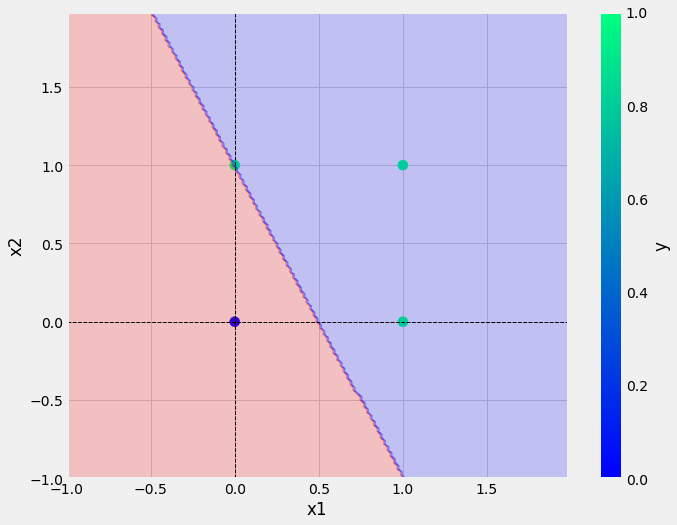

In [54]:
save_plot(df, "or.png", model_OR)

In [55]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1],
}

df = pd.DataFrame(AND)

df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [56]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_AND = Perceptron(eta=ETA, epochs=EPOCHS)
model_AND.fit(X, y)

_ = model_AND.total_loss()


initial weights before training: 
[ 1.84965134e-05  6.20541381e-05 -1.86371230e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[-0.2999815  -0.29993795  0.89998136]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[1.84965134e-05 6.20541381e-05 5.99981363e-01]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[0.3000185  0.30006205 0.29998136]
############################

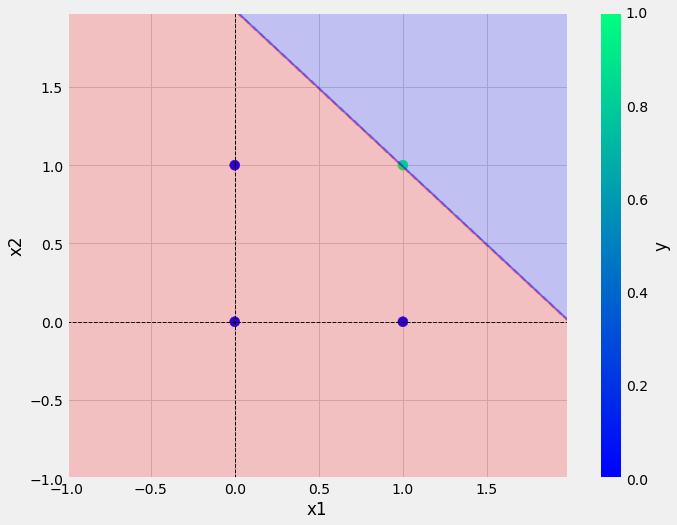

In [57]:
save_plot(df, "and.png", model_AND)


In [58]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0],
}

df = pd.DataFrame(XOR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [59]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_XOR = Perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()


initial weights before training: 
[-1.78441500e-04 -4.33438189e-05 -2.21092703e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[1 0 0 0]
error: 
0   -1
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.29982156  0.29995666 -0.30002211]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[-1.78441500e-04 -4.33438189e-05  2.99977891e-01]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[ 0.29982156  0.29995666 -0.30002211]
######################

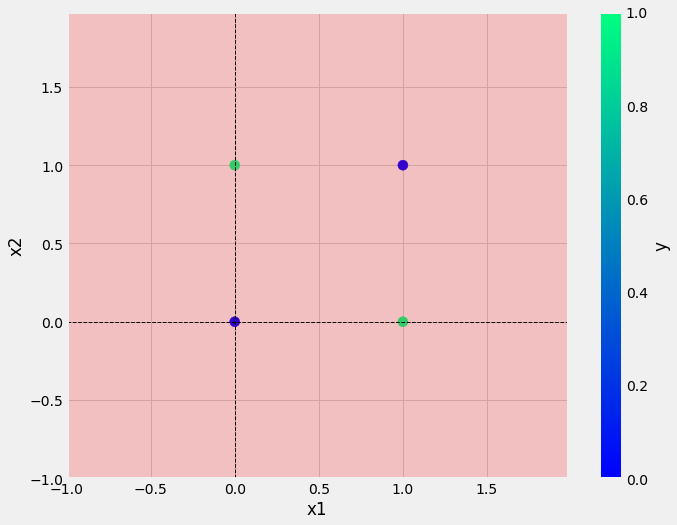

In [60]:
save_plot(df, "xor.png", model_XOR)


In [61]:
NAND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [1,1,1,0],
}

df = pd.DataFrame(NAND)

df

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


In [62]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_NAND = Perceptron(eta=ETA, epochs=EPOCHS)
model_NAND.fit(X, y)

_ = model_NAND.total_loss()


initial weights before training: 
[-4.82405348e-05 -3.66370953e-05  1.81935043e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    1
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.29995176  0.29996336 -0.89981806]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[-4.82405348e-05 -3.66370953e-05 -5.99818065e-01]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[-0.30004824 -0.30003664 -0.29981806]
######################

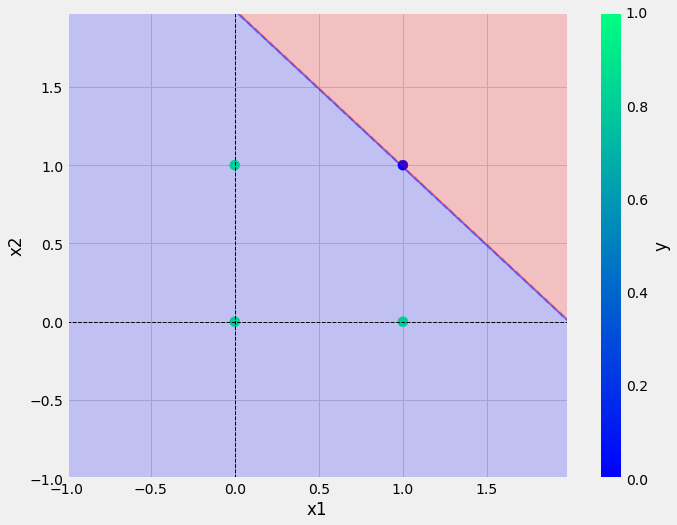

In [64]:
save_plot(df, "Nand.png", model_NAND)
